#Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import libraries

In [ ]:
seed=42
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import seaborn as sns

#Universal variables

In [ ]:
numero_cicli=2
fs=128
bpm_min=40
lunghezza_max=int(60*numero_cicli*fs/bpm_min)
input_shape = [lunghezza_max,1]
batch_size = 256
epochs = 50
LR = 0.0005
patience_ES = 15
patience_LR = 15
factor_LR = 0.5

#Load data

### IMPORT TRAINING STATS

In [ ]:
train_diff_amp_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_train_S.npy')
train_diff_amp_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_train_V.npy')

train_diff_p_s_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_train_S.npy')
train_diff_p_s_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_train_V.npy')

train_entr_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_train_S.npy')
train_entr_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_train_V.npy')

train_kurt_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_train_S.npy')
train_kurt_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_train_V.npy')

train_mean_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_train_S.npy')
train_mean_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_train_V.npy')

train_rms_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_train_S.npy')
train_rms_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_train_V.npy')

train_skew_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_train_S.npy')
train_skew_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_train_V.npy')

train_std_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_train_S.npy')
train_std_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_train_V.npy')


### IMPORT VALIDATION STATS

In [ ]:
val_diff_amp_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_val_S.npy')
val_diff_amp_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_val_V.npy')
val_diff_p_s_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_val_S.npy')
val_diff_p_s_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_val_V.npy')
val_entr_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_val_S.npy')
val_entr_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_val_V.npy')
val_kurt_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_val_S.npy')
val_kurt_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_val_V.npy')
val_mean_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_val_S.npy')
val_mean_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_val_V.npy')
val_rms_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_val_S.npy')
val_rms_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_val_V.npy')
val_skew_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_val_S.npy')
val_skew_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_val_V.npy')
val_std_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_val_S.npy')
val_std_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_val_V.npy')

### IMPORT TEST STATS

In [ ]:
test_diff_amp_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_test_S.npy')
test_diff_amp_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_test_V.npy')

test_diff_p_s_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_test_S.npy')
test_diff_p_s_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_test_V.npy')

test_entr_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_test_S.npy')
test_entr_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_test_V.npy')

test_kurt_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_test_S.npy')
test_kurt_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_test_V.npy')

test_mean_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_test_S.npy')
test_mean_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_test_V.npy')

test_rms_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_test_S.npy')
test_rms_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_test_V.npy')

test_skew_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_test_S.npy')
test_skew_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_test_V.npy')

test_std_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_test_S.npy')
test_std_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_test_V.npy')


##TEST-VALIDATION

In [ ]:
max_S = np.max(train_diff_p_s_S)
min_S = np.min(train_diff_p_s_S)

max_V = np.max(val_diff_p_s_V)
min_V = np.min(val_diff_p_s_V)

max = np.max([max_S,max_V])
min = np.min([min_S,min_V])

In [ ]:
print(max)
print(min)

225
35


In [ ]:
def merge_stats(N,a,b,c,d,e,f,g,h):
  final = [0]*N
  temp = []
  for i in range(N): #for the different signal
    temp.append([a[i][0],a[i][1],(b[i][0]-min)/(max-min),(b[i][1]-min)/(max-min),c[i],d[i],e[i],f[i],g[i],h[i]])
    final[i] = temp
    temp = []
  return np.array(final)

In [ ]:
train_stats_S = np.squeeze(merge_stats(train_diff_p_s_S.shape[0], train_diff_amp_S, train_diff_p_s_S, train_entr_S, train_kurt_S, train_mean_S, train_rms_S, train_skew_S, train_std_S))
train_stats_V = np.squeeze(merge_stats(train_diff_p_s_V.shape[0], train_diff_amp_V, train_diff_p_s_V, train_entr_V, train_kurt_V, train_mean_V, train_rms_V, train_skew_V, train_std_V))

val_stats_S = np.squeeze(merge_stats(val_diff_p_s_S.shape[0], val_diff_amp_S, val_diff_p_s_S, val_entr_S, val_kurt_S, val_mean_S, val_rms_S, val_skew_S, val_std_S))
val_stats_V = np.squeeze(merge_stats(val_diff_p_s_V.shape[0], val_diff_amp_V, val_diff_p_s_V, val_entr_V, val_kurt_V, val_mean_V, val_rms_V, val_skew_V, val_std_V))

test_stats_S = np.squeeze(merge_stats(test_diff_p_s_S.shape[0], test_diff_amp_S, test_diff_p_s_S, test_entr_S, test_kurt_S, test_mean_S, test_rms_S, test_skew_S, test_std_S))
test_stats_V = np.squeeze(merge_stats(test_diff_p_s_V.shape[0], test_diff_amp_V, test_diff_p_s_V, test_entr_V, test_kurt_V, test_mean_V, test_rms_V, test_skew_V, test_std_V))


In [ ]:
# [0] -> S
# [1] -> V

X_train=np.concatenate([train_stats_S,train_stats_V,test_stats_S,test_stats_V],axis = 0)
y_train=[]
for i in range(train_stats_S.shape[0]):
  y_train.append([0])
for i in range(train_stats_V.shape[0]):
  y_train.append([1])
for i in range(test_stats_S.shape[0]):
  y_train.append([0])
for i in range(test_stats_V.shape[0]):
  y_train.append([1])
y_train=np.array(y_train)

X_val=np.concatenate([val_stats_S,val_stats_V],axis = 0)
y_val=[]
for i in range(val_stats_S.shape[0]):
  y_val.append([0])
for i in range(val_stats_V.shape[0]):
  y_val.append([1])
y_val=np.array(y_val)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(9125, 10)
(2103, 10)
(9125, 1)
(2103, 1)


#PCA

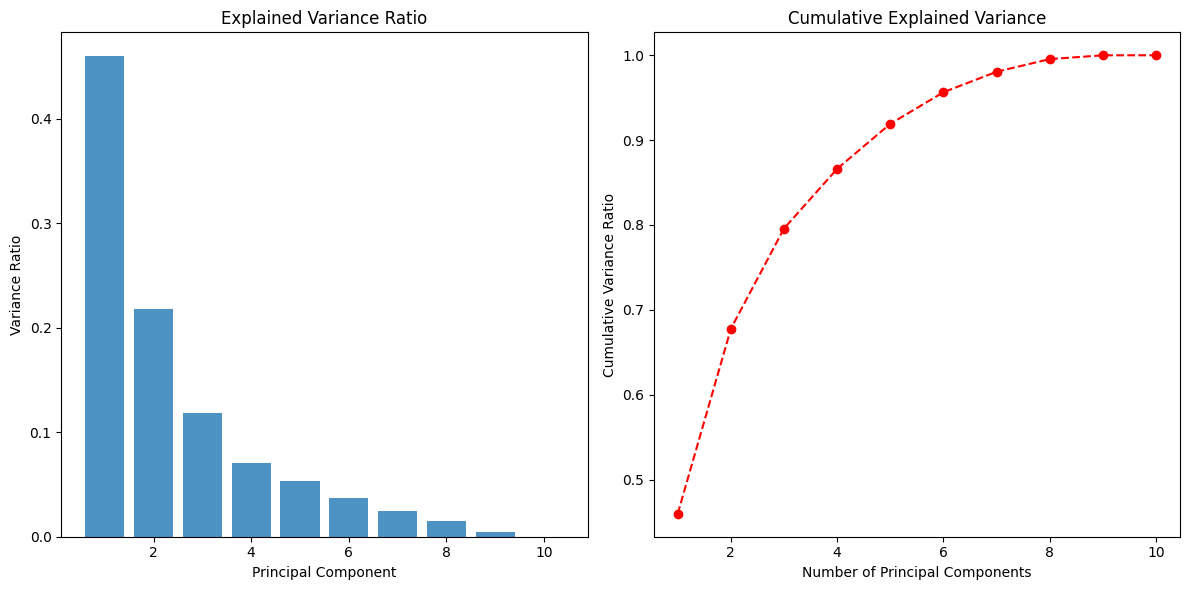

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is stored in X and labels in y
# X.shape should be (9125, 10) and y.shape should be (9125,)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(12, 6))

# Plot Explained Variance Ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')

# Plot Cumulative Explained Variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='red')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')

plt.tight_layout()
plt.show()


In [ ]:
# Print the loadings for PC1
for a in range(4):
  print("Loadings for PC",str(a+1),":")
  loadings_pc1 = pca.components_[a]
  for feature, loading in zip(range(1, len(loadings_pc1) + 1), loadings_pc1):
      print(f"Feature {feature}: {loading:.4f}")
  print()
  print()

Loadings for PC 1 :
Feature 1: 0.2477
Feature 2: 0.3324
Feature 3: 0.0010
Feature 4: 0.1964
Feature 5: 0.0865
Feature 6: 0.3703
Feature 7: -0.4373
Feature 8: -0.4467
Feature 9: 0.4291
Feature 10: -0.2647


Loadings for PC 2 :
Feature 1: 0.1768
Feature 2: 0.2162
Feature 3: 0.3725
Feature 4: 0.5277
Feature 5: 0.6002
Feature 6: -0.2540
Feature 7: 0.0538
Feature 8: 0.0950
Feature 9: -0.1156
Feature 10: 0.2341


Loadings for PC 3 :
Feature 1: -0.4020
Feature 2: -0.3535
Feature 3: 0.6326
Feature 4: 0.0195
Feature 5: 0.1272
Feature 6: 0.2552
Feature 7: 0.0722
Feature 8: -0.0305
Feature 9: -0.0015
Feature 10: -0.4748


Loadings for PC 4 :
Feature 1: -0.6778
Feature 2: 0.0374
Feature 3: 0.0833
Feature 4: 0.0543
Feature 5: -0.0620
Feature 6: -0.1226
Feature 7: -0.2932
Feature 8: -0.1569
Feature 9: 0.3272
Feature 10: 0.5411




In [ ]:
n_components = 4

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Models

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,70,50],
    'max_depth': [40, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5,10, 15]
}

scoring_metrics = ['precision_macro', 'recall_macro', 'f1_macro']

rf_model=RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring=scoring_metrics, refit='f1_macro',n_jobs=-1)

grid_search.fit(X_train, y_train)  # Note: y_train should be a 1D array

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_val)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 10}


Accuracy: 0.56
Precision: 0.56
Recall: 0.56
F1-score: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.59      1212
           1       0.48      0.59      0.53       891

    accuracy                           0.56      2103
   macro avg       0.56      0.56      0.56      2103
weighted avg       0.57      0.56      0.56      2103



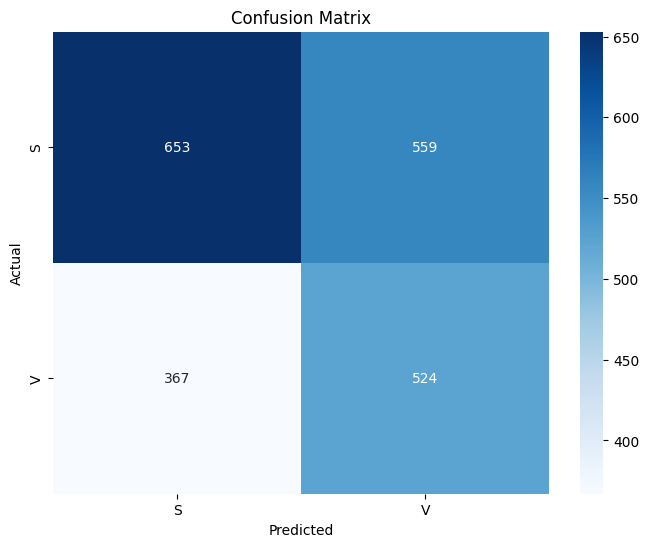

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("Classification Report:")
print(classification_report(y_val, y_pred))
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['S', 'V'], yticklabels=['S', 'V'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dump(best_model, '/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/random_forest_model.pkl')
#loaded_model = load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/random_forest_model.pkl')

['/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/random_forest_model.pkl']

##SVM

In [ ]:
from sklearn import svm

param_grid = {
    'C':[0.50,0.1,0.05,0.001],
    'kernel':['rbf'],
    'gamma':['scale'],
    'class_weight':['balanced'],
    'verbose':[True]
}

scoring_metrics = ['precision_macro', 'recall_macro', 'f1_macro']

rf_model=svm.SVC()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring=scoring_metrics, refit='f1_macro',n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

[LibSVM]Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'verbose': True}


Accuracy: 0.44
Precision: 0.47
Recall: 0.48
F1-score: 0.42
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.23      0.32      1212
           1       0.41      0.73      0.53       891

    accuracy                           0.44      2103
   macro avg       0.47      0.48      0.42      2103
weighted avg       0.48      0.44      0.41      2103



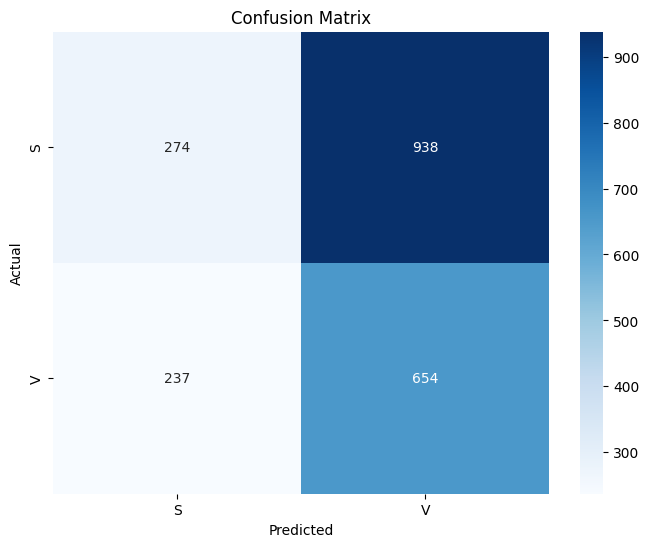

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("Classification Report:")
print(classification_report(y_val, y_pred))
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['S', 'V'], yticklabels=['S', 'V'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dump(best_model, '/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/SVM.pkl')
#loaded_model = load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/SVM.pkl')

['/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/SVM.pkl']

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [ 5,8,10,12,15,17,20,22,24,30],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

scoring_metrics = ['precision_macro', 'recall_macro', 'f1_macro']
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, scoring=scoring_metrics, refit='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_val)

Best Parameters: {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


Accuracy: 0.57
Precision: 0.56
Recall: 0.57
F1-score: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      1212
           1       0.49      0.56      0.52       891

    accuracy                           0.57      2103
   macro avg       0.56      0.57      0.56      2103
weighted avg       0.58      0.57      0.57      2103



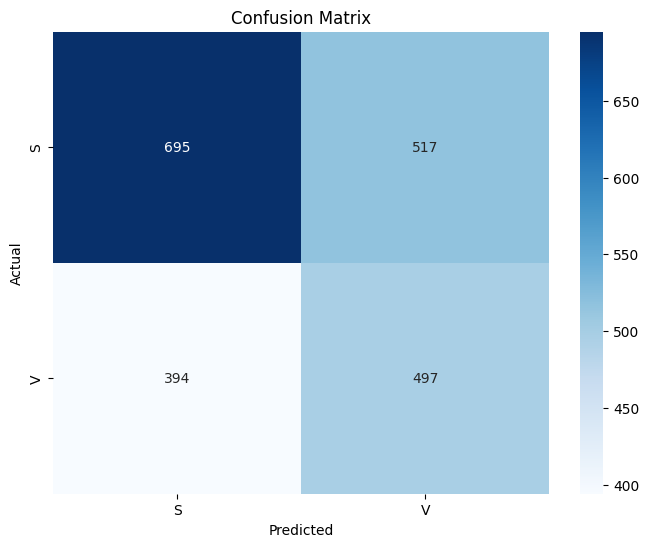

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("Classification Report:")
print(classification_report(y_val, y_pred))
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['S', 'V'], yticklabels=['S', 'V'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dump(best_model, '/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/KNN.pkl')
#loaded_model = load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/KNN.pkl')

['/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/KNN.pkl']

####KNN with PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [ 5,8,10,12,15,17,20,22,24,30],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

scoring_metrics = ['precision_macro', 'recall_macro', 'f1_macro']
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, scoring=scoring_metrics, refit='f1_macro', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_pca)

Best Parameters: {'n_neighbors': 30, 'p': 2, 'weights': 'uniform'}


Accuracy: 0.52
Precision: 0.52
Recall: 0.52
F1-score: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.52      0.56      1212
           1       0.44      0.51      0.47       891

    accuracy                           0.52      2103
   macro avg       0.52      0.52      0.51      2103
weighted avg       0.53      0.52      0.52      2103



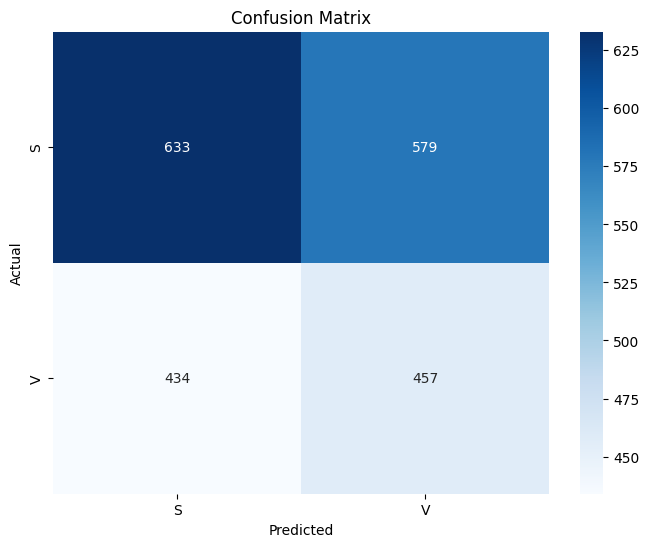

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("Classification Report:")
print(classification_report(y_val, y_pred))
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['S', 'V'], yticklabels=['S', 'V'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dump(best_model, '/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/KNN_PCA.pkl')
#loaded_model = load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/KNN_PCA.pkl')

['/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/KNN_PCA.pkl']